In [1]:
from aiy.vision.inference import CameraInference
from aiy.vision.models import face_detection
from aiy.leds import Leds, Color

from picamera import PiCamera
from IPython.display import Image, display, clear_output

import contextlib

### Joy Trigger

The code below will take a picture if the joy score is about `joyTreshhold`. Remember if your joy detector is running, you need to turn it off using the commands

```
sudo systemctl stop joy_detection_demo.service
```


In [ ]:
# Where to save the images
imageDir = "/home/pi/Pictures"

# Joy threshhold to take a picture
joyTreshhold = 0.5

Joy score:  0.5766015648841858
Joy detected - saving picture ..


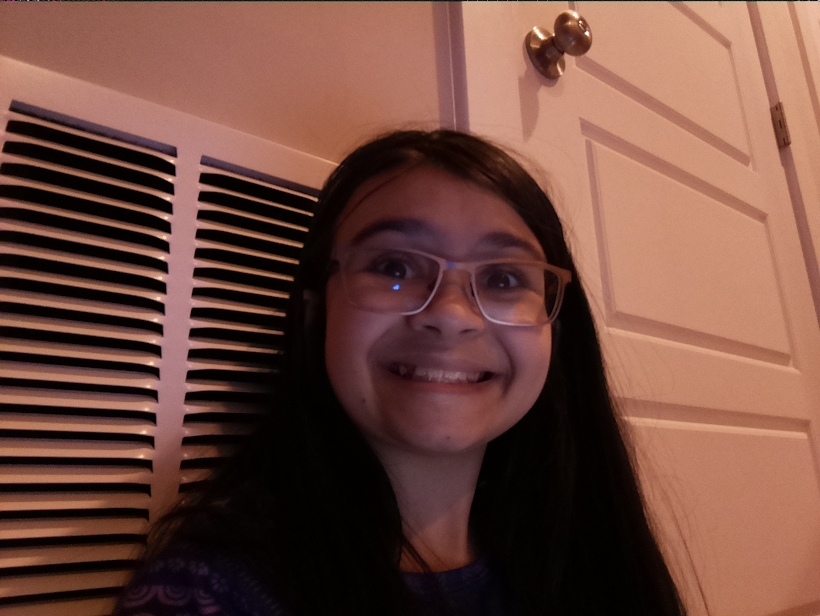

Done


In [6]:
with contextlib.ExitStack() as stack:
    leds   = stack.enter_context(Leds())
    camera = stack.enter_context(PiCamera(sensor_mode=4, resolution=(820, 616)))

    print ("Loading model - hold on ..")
    
    # Do inference on VisionBonnet
    with CameraInference(face_detection.model()) as inference:
        try:   
            for result in inference.run():
                leds.update(Leds.rgb_on(Color.RED))
                faces = face_detection.get_faces(result)

                # We have one or more faces detected
                if len(faces) >= 1:
                    clear_output(wait=True)                 
                    leds.update(Leds.rgb_on(Color.BLUE))
                    print("Joy score: ", faces[0].joy_score)
                    
                    # If we are bove the joy threshhold take the image
                    if(faces[0].joy_score > joyTreshhold):
                        print("Joy detected - saving picture ..")
                        camera.capture(imageDir+'/faceDetect.jpg')
                        display(Image(filename=imageDir+'/faceDetect.jpg'))
                        break
                        
        except KeyboardInterrupt:
            print("Interrupted ..")
            
    leds.update(Leds.rgb_off())
    print("Done")